<center><h1>Error Analysis</h1><center>

In [1]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# Reading data

In [2]:
data=pd.read_csv("dataset.csv")
data

,id,rle_mask,img_path,mask_path,depth
0,2c45b152f1,99 3 197 6 295 9 395 10 494 12 594 13 694 14 7...,train/images/2c45b152f1.png,train/masks/2c45b152f1.png,312
1,3cb59a4fdc,1 5656,train/images/3cb59a4fdc.png,train/masks/3cb59a4fdc.png,603
2,e185ab5dc1,4647 2 4748 10 4849 18 4950 25 5051 29 5152 34...,train/images/e185ab5dc1.png,train/masks/e185ab5dc1.png,687
3,c78c89577c,101 1,train/images/c78c89577c.png,train/masks/c78c89577c.png,236
4,6306dd3a8e,1 30 102 29 203 29 304 28 405 27 506 27 607 26...,train/images/6306dd3a8e.png,train/masks/6306dd3a8e.png,805
...,...,...,...,...,...
3995,429b289e07,1 6463 6465 98 6566 97 6667 95 6768 94 6869 93...,train/images/429b289e07.png,train/masks/429b289e07.png,562
3996,5d752d6d4a,NaN,train/images/5d752d6d4a.png,train/masks/5d752d6d4a.png,235
3997,26527458de,NaN,train/images/26527458de.png,train/masks/26527458de.png,587
3998,25fb3a895a,NaN,train/images/25fb3a895a.png,train/masks/25fb3a895a.png,468


# Adding more information for these images and predictions in the dataframe for further analysis

In [3]:
def pred_image(arr,threshold=0.5):
    res=np.zeros((arr.shape[0],arr.shape[1],arr.shape[2]))
    for i,j in enumerate(arr):
        final_image=j[:,:,0]
        final_image=prob_to_image(final_image,threshold=threshold)
        res[i]=final_image
    return res
def prob_to_image(arr,threshold=0.5):
    for i in range(len(arr)):
        for j in range(len(arr)):
            if arr[i,j]>threshold:
                arr[i,j]=1
            else:
                arr[i,j]=0
    return arr

data["pred_mask_path"]=["train/pred_masks/"+i[12:] for i in data["mask_path"]]
iou_score=[]
salt_coverage=[]
pred_salt_coverage=[]

for i,j in enumerate(data["mask_path"]):
    mask=cv2.imread(j,cv2.IMREAD_GRAYSCALE)
    mask=mask//255
    salt_coverage.append(np.mean(mask))

    image=cv2.imread(data["pred_mask_path"][i],cv2.IMREAD_GRAYSCALE)
    image=image/255
    iou=tf.keras.metrics.BinaryIoU()
    pred_mask=pred_image(np.expand_dims(np.expand_dims(image,-1),0),threshold=0.5)[0]
    pred_salt_coverage.append(np.mean(pred_mask))
    
    iou_score.append(np.array(iou(mask,pred_mask)))

data["iou_score"]=iou_score
data["salt_coverage"]=salt_coverage
data["pred_salt_coverage"]=pred_salt_coverage
data

,id,rle_mask,img_path,mask_path,depth,pred_mask_path,iou_score,salt_coverage,pred_salt_coverage
0,2c45b152f1,99 3 197 6 295 9 395 10 494 12 594 13 694 14 7...,train/images/2c45b152f1.png,train/masks/2c45b152f1.png,312,train/pred_masks/2c45b152f1.png,0.9550314,0.530928,0.553573
1,3cb59a4fdc,1 5656,train/images/3cb59a4fdc.png,train/masks/3cb59a4fdc.png,603,train/pred_masks/3cb59a4fdc.png,0.22277227,0.554455,0.000000
2,e185ab5dc1,4647 2 4748 10 4849 18 4950 25 5051 29 5152 34...,train/images/e185ab5dc1.png,train/masks/e185ab5dc1.png,687,train/pred_masks/e185ab5dc1.png,0.9769155,0.481717,0.486717
3,c78c89577c,101 1,train/images/c78c89577c.png,train/masks/c78c89577c.png,236,train/pred_masks/c78c89577c.png,0.49995098,0.000098,0.000000
4,6306dd3a8e,1 30 102 29 203 29 304 28 405 27 506 27 607 26...,train/images/6306dd3a8e.png,train/masks/6306dd3a8e.png,805,train/pred_masks/6306dd3a8e.png,0.85334456,0.078718,0.091854
...,...,...,...,...,...,...,...,...,...
3995,429b289e07,1 6463 6465 98 6566 97 6667 95 6768 94 6869 93...,train/images/429b289e07.png,train/masks/429b289e07.png,562,train/pred_masks/429b289e07.png,0.94358575,0.890991,0.889030
3996,5d752d6d4a,NaN,train/images/5d752d6d4a.png,train/masks/5d752d6d4a.png,235,train/pred_masks/5d752d6d4a.png,1.0,0.000000,0.000000
3997,26527458de,NaN,train/images/26527458de.png,train/masks/26527458de.png,587,train/pred_masks/26527458de.png,1.0,0.000000,0.000000
3998,25fb3a895a,NaN,train/images/25fb3a895a.png,train/masks/25fb3a895a.png,468,train/pred_masks/25fb3a895a.png,1.0,0.000000,0.000000


# Analyzing IOU score 

In [4]:
print("Mean IOU Score is",np.mean(data["iou_score"]))
print("Median IOU Score is",np.median(data["iou_score"]))

Mean IOU Score is 0.8728441162109375
Median IOU Score is 0.9685153


Percentile values of iou scores

In [5]:
iou_scores=np.sort(data["iou_score"])
print("5 percentile IOU score is:",iou_scores[int(0.05*len(iou_scores))])
print("10 percentile IOU score is:",iou_scores[int(0.1*len(iou_scores))])
print("33 percentile IOU score is:",iou_scores[int(0.3333*len(iou_scores))])
print("50 percentile IOU score is:",iou_scores[int(0.5*len(iou_scores))])
print("66 percentile IOU score is:",iou_scores[int(0.6666*len(iou_scores))])
print("90 percentile IOU score is:",iou_scores[int(0.9*len(iou_scores))])

5 percentile IOU score is: 0.46159706
10 percentile IOU score is: 0.49921575
33 percentile IOU score is: 0.9221965
50 percentile IOU score is: 0.9685186
66 percentile IOU score is: 1.0
90 percentile IOU score is: 1.0


## Histogram

bins=3


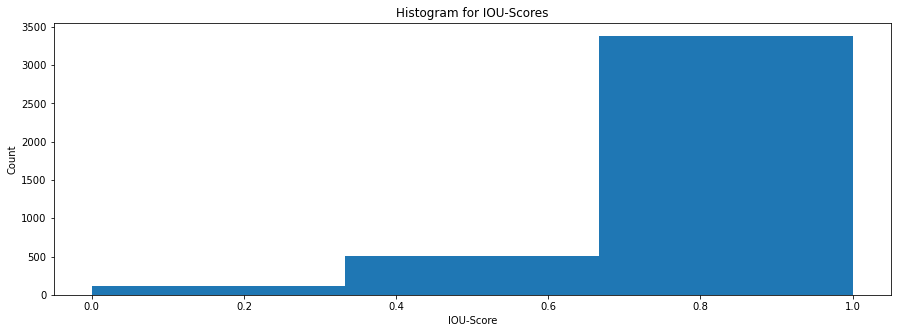

In [6]:
print("bins=3")
plt.figure(figsize=(15,5))
plt.title("Histogram for IOU-Scores")
plt.hist(data["iou_score"],bins=3)
plt.xlabel("IOU-Score")
plt.ylabel("Count")
plt.show()

Majority of values have iou score greater than 0.6<br>
Increasing the bins

bins=27


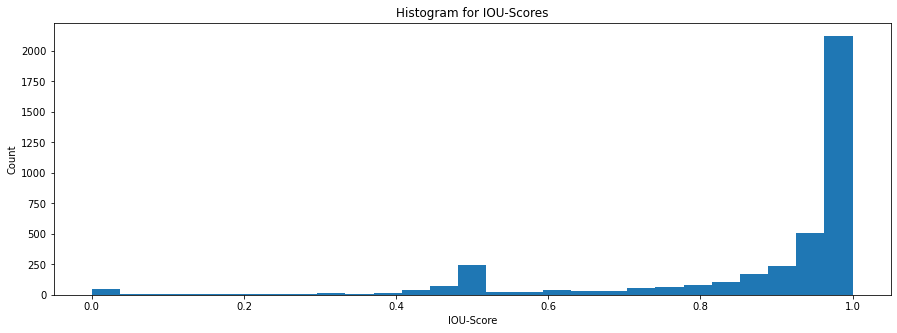

In [7]:
print("bins=27")
plt.figure(figsize=(15,5))
plt.title("Histogram for IOU-Scores")
plt.hist(data["iou_score"],bins=27)
plt.xlabel("IOU-Score")
plt.ylabel("Count")
plt.show()

# Dividing data into 3 bins based on IOU-Scores

In [8]:
print("There are",data[data["iou_score"]==1].shape[0],"images with IOU score equal to 1")

There are 1495 images with IOU score equal to 1


## Let this be bin 3<br>
# Divide rest images into 2 bins based on iou_score

In [9]:
bin1_2=data[data["iou_score"]<1]
bin1_2.reset_index(drop=True,inplace=True)

In [10]:
iou_scores=np.sort(bin1_2["iou_score"])
print("5 percentile IOU score is:",iou_scores[int(0.05*len(iou_scores))])
print("10 percentile IOU score is:",iou_scores[int(0.1*len(iou_scores))])
print("50 percentile IOU score is:",iou_scores[int(0.5*len(iou_scores))])
print("90 percentile IOU score is:",iou_scores[int(0.9*len(iou_scores))])

bin1=bin1_2[bin1_2["iou_score"]<0.9]
bin1.reset_index(drop=True,inplace=True)
bin2=bin1_2[bin1_2["iou_score"]>=0.9]
bin2.reset_index(drop=True,inplace=True)

5 percentile IOU score is: 0.38432506
10 percentile IOU score is: 0.4821586
50 percentile IOU score is: 0.90997005
90 percentile IOU score is: 0.9784457


# Analyzing bin1

In [11]:
iou_scores=np.sort(bin1["iou_score"])
print("Mean IOU score is:",np.mean(iou_scores))
print("5 percentile IOU score is:",iou_scores[int(0.05*len(iou_scores))])
print("10 percentile IOU score is:",iou_scores[int(0.1*len(iou_scores))])
print("50 percentile IOU score is:",iou_scores[int(0.5*len(iou_scores))])
print("90 percentile IOU score is:",iou_scores[int(0.9*len(iou_scores))])

Mean IOU score is: 0.62110573
5 percentile IOU score is: 0.11386139
10 percentile IOU score is: 0.35981765
50 percentile IOU score is: 0.6375704
90 percentile IOU score is: 0.8774642


bins=27


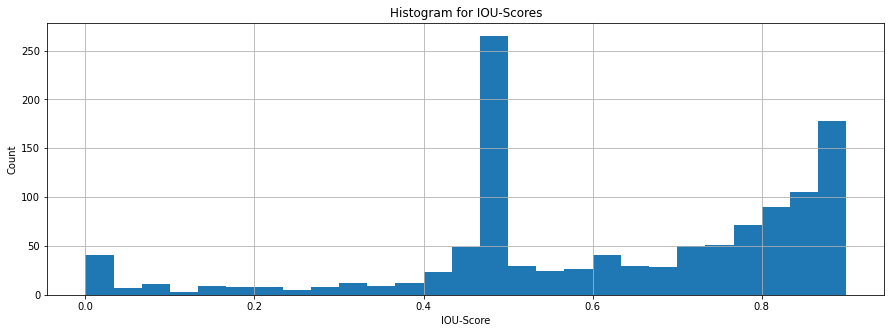

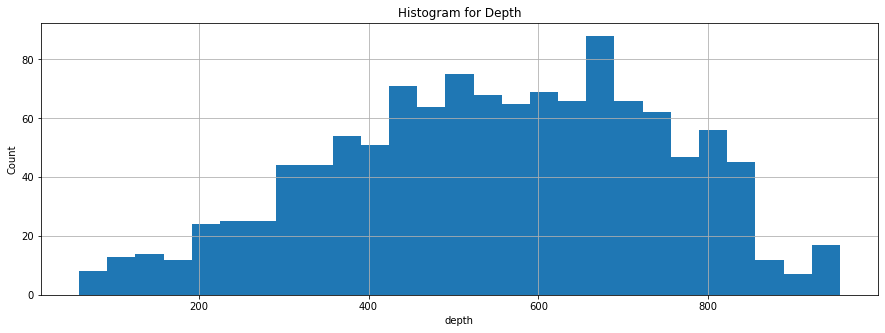

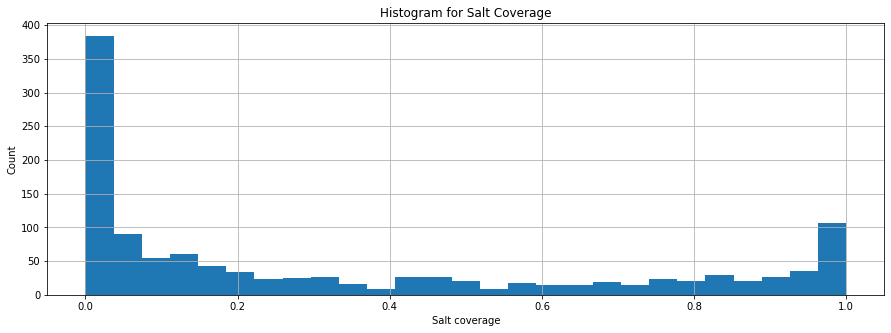

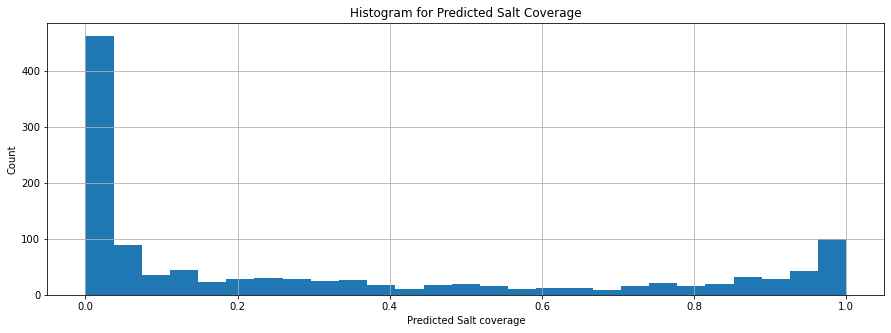

In [12]:
print("bins=27")
plt.figure(figsize=(15,5))
plt.title("Histogram for IOU-Scores")
plt.hist(bin1["iou_score"],bins=27)
plt.xlabel("IOU-Score")
plt.ylabel("Count")
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
plt.title("Histogram for Depth")
plt.hist(bin1["depth"],bins=27)
plt.xlabel("depth")
plt.ylabel("Count")
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
plt.title("Histogram for Salt Coverage")
plt.hist(bin1["salt_coverage"],bins=27)
plt.xlabel("Salt coverage")
plt.ylabel("Count")
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
plt.title("Histogram for Predicted Salt Coverage")
plt.hist(bin1["pred_salt_coverage"],bins=27)
plt.xlabel("Predicted Salt coverage")
plt.ylabel("Count")
plt.grid()
plt.show()

#### Salt-coverage seems less

## Randomly visualizing bin1 images and masks

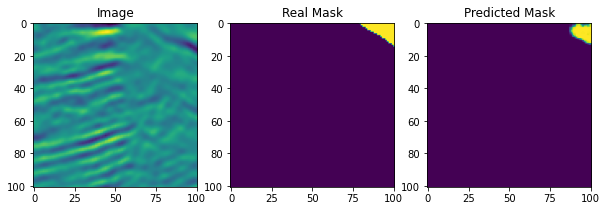

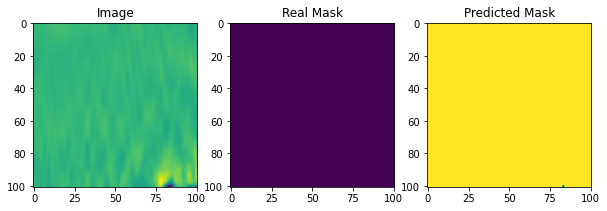

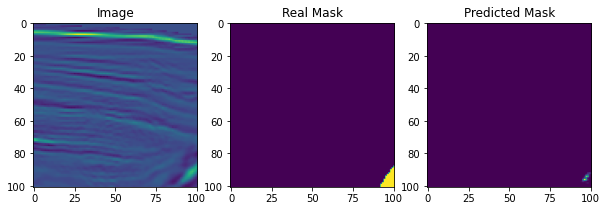

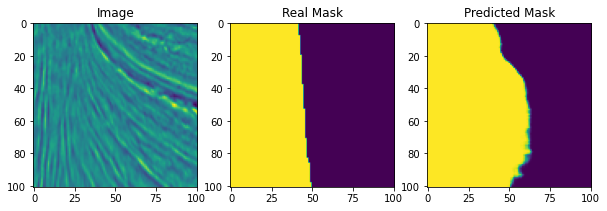

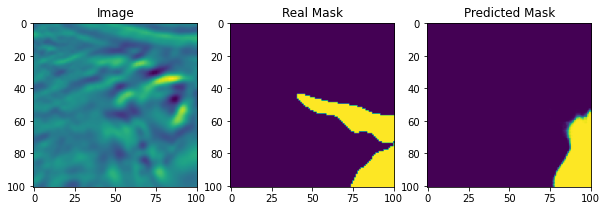

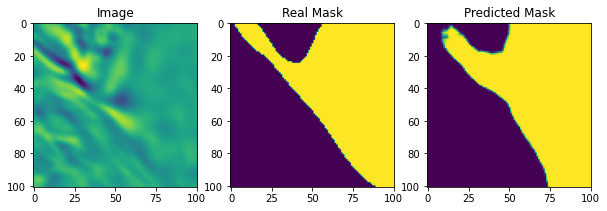

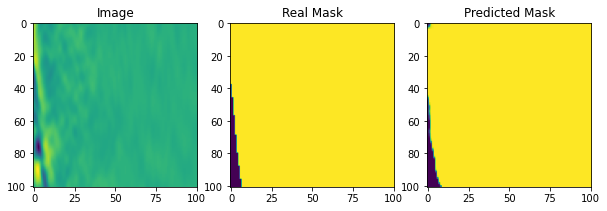

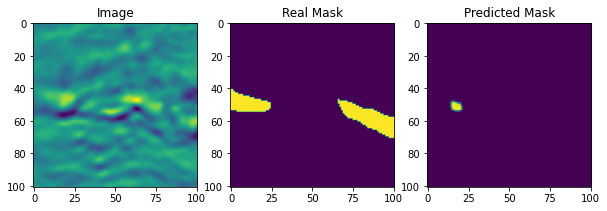

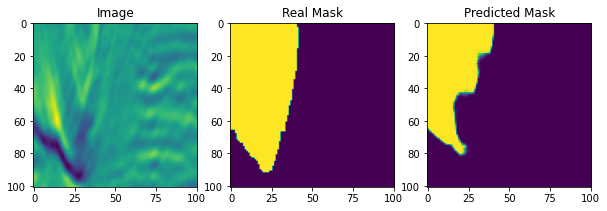

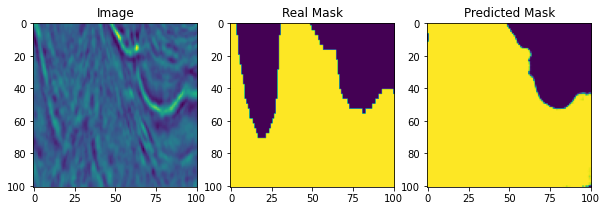

In [13]:
for i in np.random.randint(0,len(bin1["img_path"]),10):
    plt.figure(figsize=(10,10))
    img=cv2.imread(bin1["img_path"][i],cv2.IMREAD_GRAYSCALE)
    plt.subplot(1,3,1)
    plt.title("Image")
    plt.imshow(img)
    
    img=cv2.imread(bin1["mask_path"][i],cv2.IMREAD_GRAYSCALE)
    plt.subplot(1,3,2)
    plt.title("Real Mask")
    plt.imshow(img)
    
    img=cv2.imread(bin1["pred_mask_path"][i],cv2.IMREAD_GRAYSCALE)
    plt.subplot(1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(img)
    plt.show()

Its obviously clear model is failing somewhat in segmenting masks

# Analyzing bin2

In [14]:
iou_scores=np.sort(bin2["iou_score"])
print("Mean IOU score is:",np.mean(iou_scores))
print("5 percentile IOU score is:",iou_scores[int(0.05*len(iou_scores))])
print("10 percentile IOU score is:",iou_scores[int(0.1*len(iou_scores))])
print("50 percentile IOU score is:",iou_scores[int(0.5*len(iou_scores))])
print("90 percentile IOU score is:",iou_scores[int(0.9*len(iou_scores))])

Mean IOU score is: 0.9566024
5 percentile IOU score is: 0.91145736
10 percentile IOU score is: 0.920855
50 percentile IOU score is: 0.96192837
90 percentile IOU score is: 0.9836632


bins=27


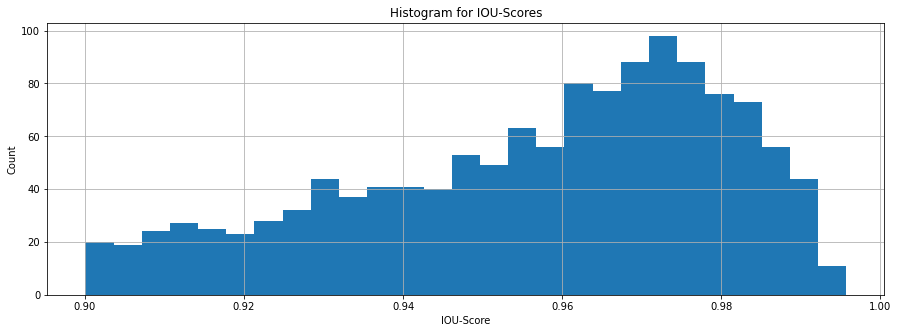

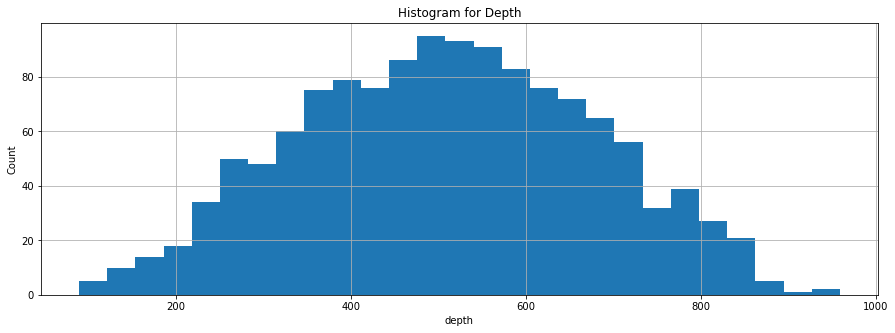

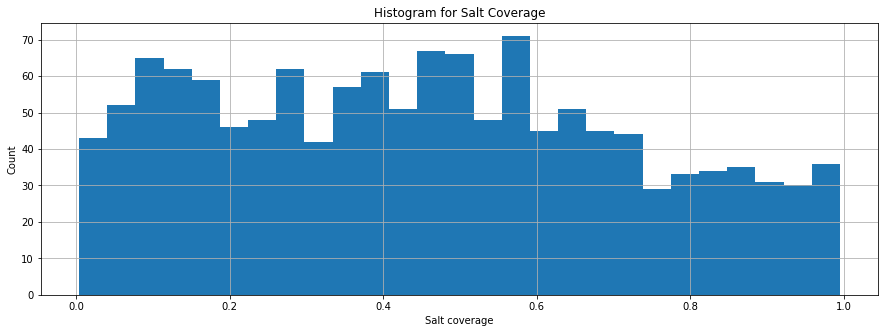

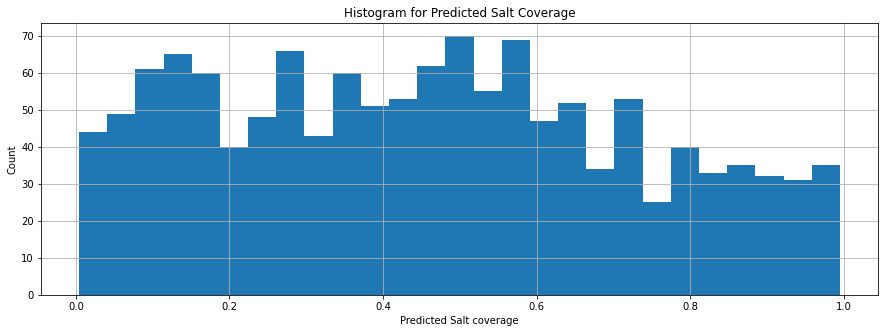

In [15]:
print("bins=27")
plt.figure(figsize=(15,5))
plt.title("Histogram for IOU-Scores")
plt.hist(bin2["iou_score"],bins=27)
plt.xlabel("IOU-Score")
plt.ylabel("Count")
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
plt.title("Histogram for Depth")
plt.hist(bin2["depth"],bins=27)
plt.xlabel("depth")
plt.ylabel("Count")
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
plt.title("Histogram for Salt Coverage")
plt.hist(bin2["salt_coverage"],bins=27)
plt.xlabel("Salt coverage")
plt.ylabel("Count")
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
plt.title("Histogram for Predicted Salt Coverage")
plt.hist(bin2["pred_salt_coverage"],bins=27)
plt.xlabel("Predicted Salt coverage")
plt.ylabel("Count")
plt.grid()
plt.show()

#### Salt Coverage looks more evenly distributed
#### Most of the images have a very good IOU score

## Randomly visualizing bin2 images and masks

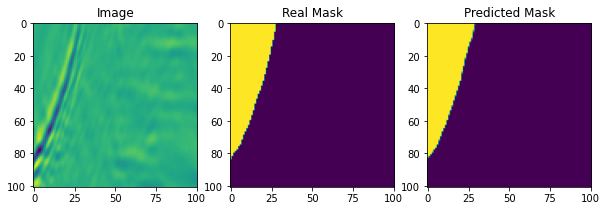

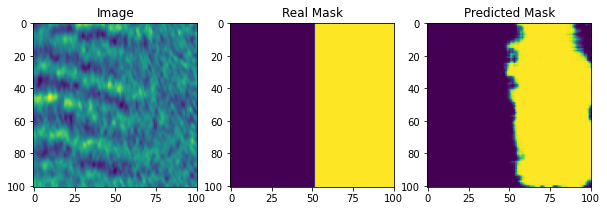

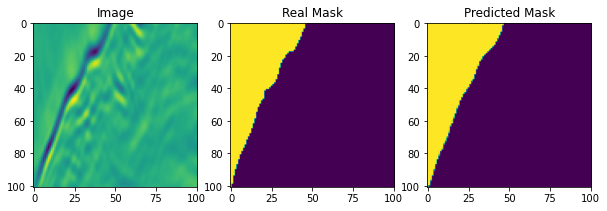

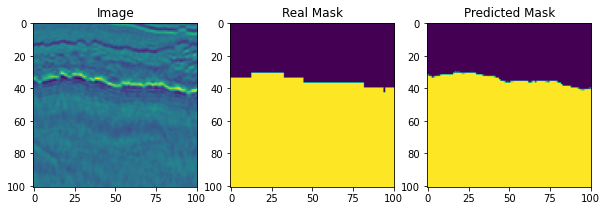

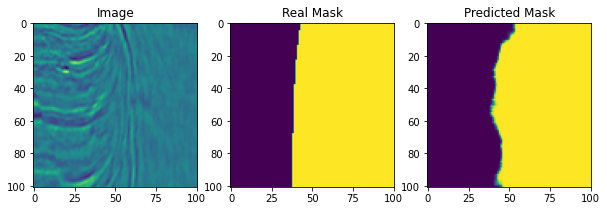

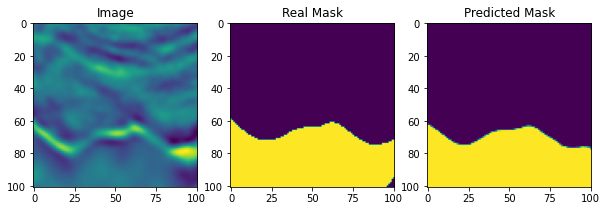

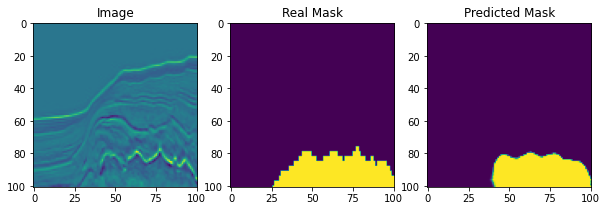

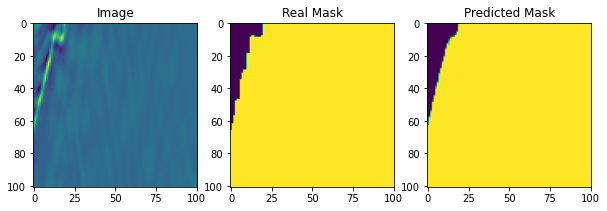

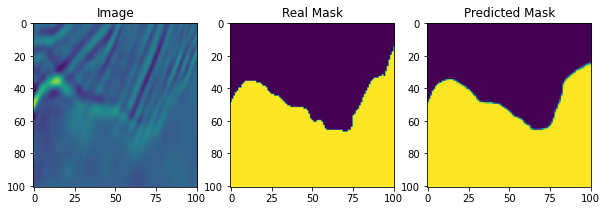

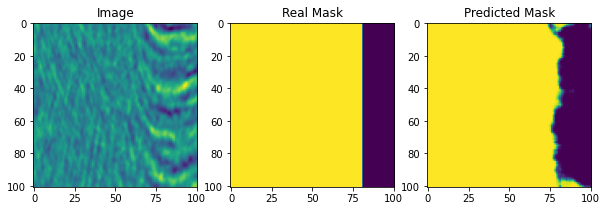

In [16]:
for i in np.random.randint(0,len(bin2["img_path"]),10):
    plt.figure(figsize=(10,10))
    img=cv2.imread(bin2["img_path"][i],cv2.IMREAD_GRAYSCALE)
    plt.subplot(1,3,1)
    plt.title("Image")
    plt.imshow(img)
    
    img=cv2.imread(bin2["mask_path"][i],cv2.IMREAD_GRAYSCALE)
    plt.subplot(1,3,2)
    plt.title("Real Mask")
    plt.imshow(img)
    
    img=cv2.imread(bin2["pred_mask_path"][i],cv2.IMREAD_GRAYSCALE)
    plt.subplot(1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(img)
    plt.show()

#### These can be the best examples of successful segmentations for the model.

# Analyzing bin3
Bin3 consists of all images with IOU score 1

In [17]:
bin3=data[data["iou_score"]==1]
bin3.reset_index(drop=True,inplace=True)

bins=27


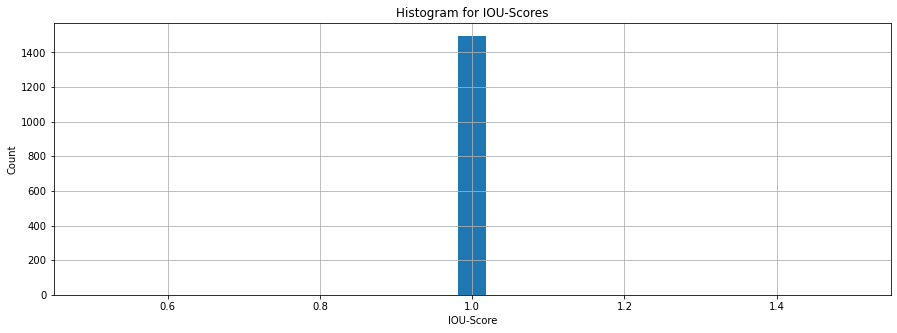

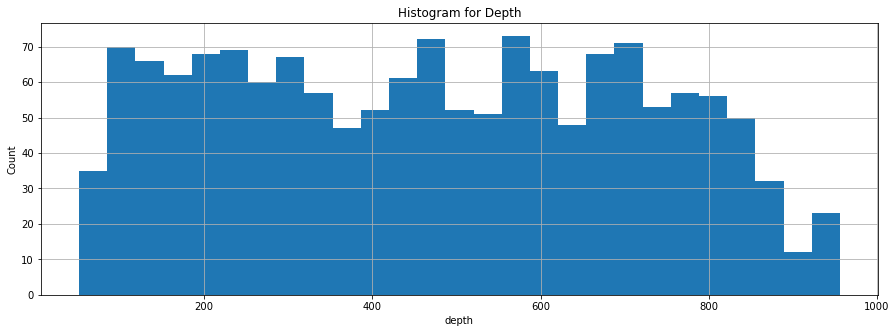

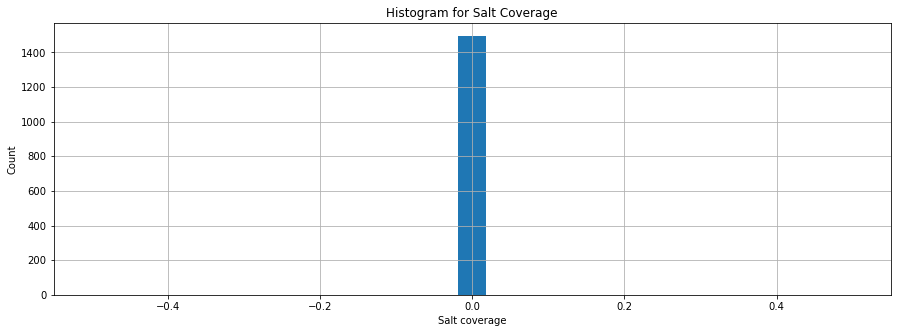

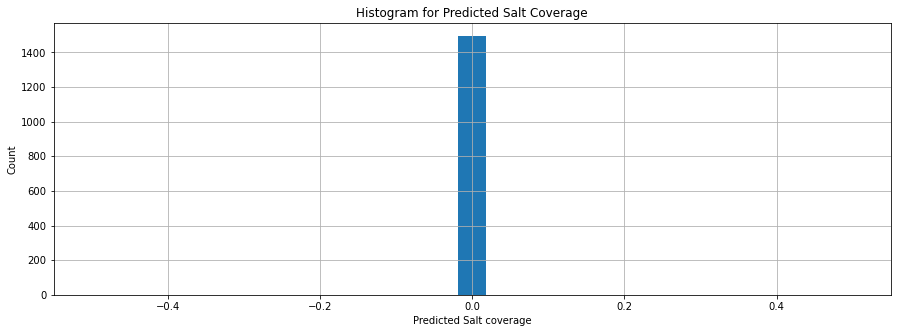

In [18]:
print("bins=27")
plt.figure(figsize=(15,5))
plt.title("Histogram for IOU-Scores")
plt.hist(bin3["iou_score"],bins=27)
plt.xlabel("IOU-Score")
plt.ylabel("Count")
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
plt.title("Histogram for Depth")
plt.hist(bin3["depth"],bins=27)
plt.xlabel("depth")
plt.ylabel("Count")
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
plt.title("Histogram for Salt Coverage")
plt.hist(bin3["salt_coverage"],bins=27)
plt.xlabel("Salt coverage")
plt.ylabel("Count")
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
plt.title("Histogram for Predicted Salt Coverage")
plt.hist(bin3["pred_salt_coverage"],bins=27)
plt.xlabel("Predicted Salt coverage")
plt.ylabel("Count")
plt.grid()
plt.show()

#### Salt Coverage is 0 and IOU-score is 1 with depth almost uniformly distributed, which means this bin is full of empty images devoid of salt deposits with no correlation to depth and the good thing is, our model is able to detect them graciously well

## Randomly visualizing bin3 images and masks

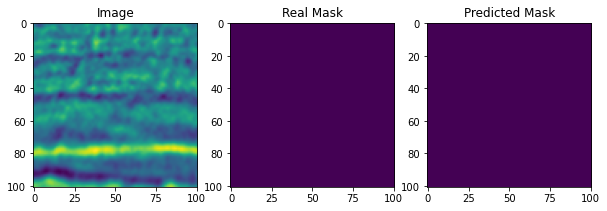

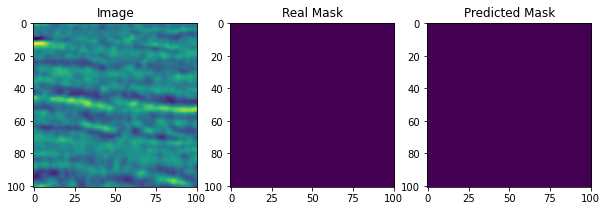

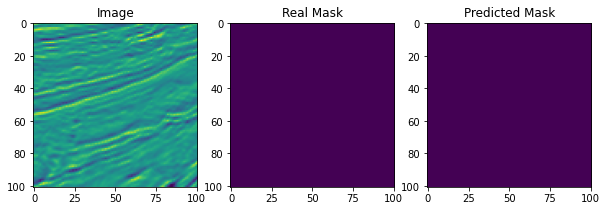

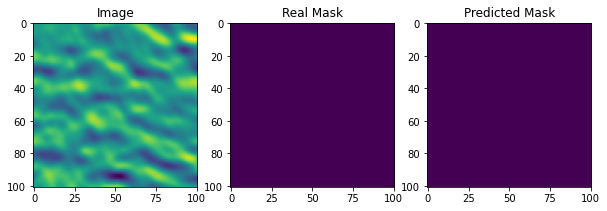

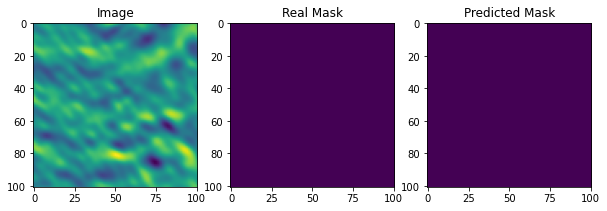

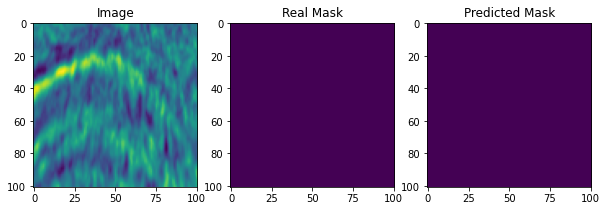

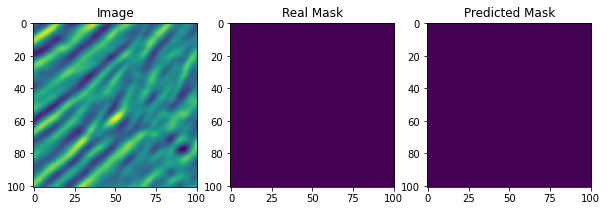

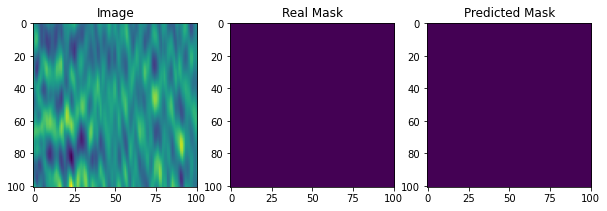

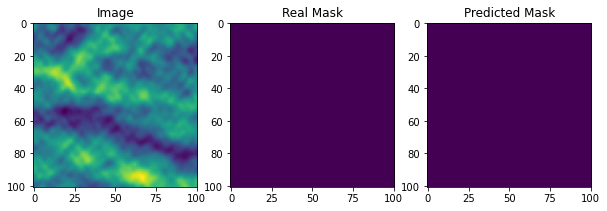

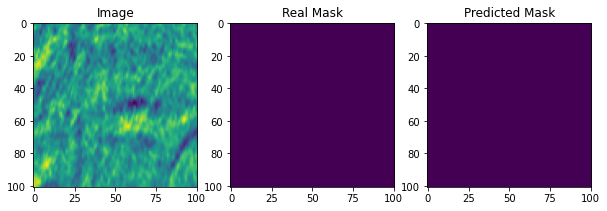

In [19]:
for i in np.random.randint(0,1495,10):
    plt.figure(figsize=(10,10))
    img=cv2.imread(bin3["img_path"][i],cv2.IMREAD_GRAYSCALE)
    plt.subplot(1,3,1)
    plt.title("Image")
    plt.imshow(img)
    
    img=cv2.imread(bin3["mask_path"][i],cv2.IMREAD_GRAYSCALE)
    plt.subplot(1,3,2)
    plt.title("Real Mask")
    plt.imshow(img)
    
    img=cv2.imread(bin3["pred_mask_path"][i],cv2.IMREAD_GRAYSCALE)
    plt.subplot(1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(img)
    plt.show()

## Checking how many of em are empty

In [20]:
img_empty=0
mask_empty=0
for i in range(1495):
    img=cv2.imread(bin3["img_path"][i],cv2.IMREAD_GRAYSCALE)
    if len(np.unique(img))==1:
        img_empty+=1
    mask=cv2.imread(bin3["mask_path"][i],cv2.IMREAD_GRAYSCALE)
    if len(np.unique(mask))==1:
        mask_empty+=1    
print("In bin3, No. of empty images are:",img_empty,"and empty masks are ",mask_empty)
        
img_empty=0
mask_empty=0
for i in range(4000):
    img=cv2.imread(data["img_path"][i],cv2.IMREAD_GRAYSCALE)
    if len(np.unique(img))==1:
        img_empty+=1
    mask=cv2.imread(data["mask_path"][i],cv2.IMREAD_GRAYSCALE)
    if len(np.unique(mask))==1:
        mask_empty+=1    
        
        
print("In whole dataset, No. of empty images are:",img_empty,"and empty masks are ",mask_empty)

In bin3, No. of empty images are: 80 and empty masks are  1495
In whole dataset, No. of empty images are: 80 and empty masks are  1562


#### So all masks in this bin are empty
Around 39% of all images have no salt deposits and 95.7% of them are correctly segmented by model which is clearly a very good thing and theres no need of an external model to classify empty masked images

# Conclusion for Error:
Model fails badly for images with low salt coverage and moderate depth which is quite evident in bin1.<br> However, it works great at detecting empty images and masks so no requirement for binary classifier model.